In [1]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-03-05 02:57:45--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69826864 (67M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  66.59M   136MB/s    in 0.5s    

2019-03-05 02:57:50 (136 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [69826864/69826864]

PREFIX=/usr/local
reinstalling: python-3.7.1-h0371630_7 ...
Python 3.7.1
reinstalling: ca-certificates-2018.03.07-0 ...
reinstalling: conda-env-2.6.0-1 ...
reinstalling: libgcc-ng-8.2.0-hdf63c60_1 ...
reinstalling: libstdcxx-ng-8.2.0-hdf63c60_1 ...
reinstalling: libffi-3.2.1-hd88cf55_4 ...
reinstalling: ncurses-6.1-he6710b0_1 ...
reinstalling: openssl-1.1.1a-h7b6447c_0 ...
reinstalling: xz-5.2.4-

In [0]:
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages')

In [3]:
import numpy as np
import pandas as pd
import rdkit
from rdkit import Chem
# from rdkit import Chem

print(Chem.__doc__)

 A module for molecules and stuff

 see Chem/index.html in the doc tree for documentation




In [0]:
import pandas as pd
import numpy as np
from numpy import vectorize as vec
import scipy as sp
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors,PandasTools


In [5]:
from google.colab import files
uploaded = files.upload()

Saving nr-ar.sdf to nr-ar.sdf


In [7]:
mols=PandasTools.LoadSDF('nr-ar.sdf',smilesName='SMILES',molColName='Molecule',includeFingerprints=True)


RDKit ERROR: [03:08:17] Explicit valence for atom # 2 Si, 8, is greater than permitted
RDKit ERROR: [03:08:17] ERROR: Could not sanitize molecule ending on line 153869
RDKit ERROR: [03:08:17] ERROR: Explicit valence for atom # 2 Si, 8, is greater than permitted
RDKit ERROR: [03:08:19] Explicit valence for atom # 3 Cl, 2, is greater than permitted
RDKit ERROR: [03:08:19] ERROR: Could not sanitize molecule ending on line 223779
RDKit WARNING: [03:08:20] Warning: conflicting stereochemistry at atom 9 ignored.
RDKit WARNING: [03:08:20] Warning: conflicting stereochemistry at atom 9 ignored.
RDKit ERROR: [03:08:19] ERROR: Explicit valence for atom # 3 Cl, 2, is greater than permitted
RDKit ERROR: [03:08:22] Explicit valence for atom # 1 Cl, 2, is greater than permitted
RDKit ERROR: [03:08:22] ERROR: Could not sanitize molecule ending on line 339188
RDKit WARNING: [03:08:23] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [03:08:22] ERROR: Explicit valence for atom # 1 Cl,

In [8]:
mols.columns

Index(['Active', 'DSSTox_CID', 'FW', 'Formula', 'ID', 'Molecule', 'SMILES'], dtype='object')

In [9]:
mols.shape

(9357, 7)

In [10]:
print("Number of   active molecules:  ", list(mols.Active).count('1'))  #Active
print("Number of inactive molecules:  ", list(mols.Active).count('0'))  #Inactive

Number of   active molecules:   380
Number of inactive molecules:   8977


,Active,DSSTox_CID,FW,Formula,ID,Molecule,SMILES
0,0,26683,1342.5025 (1282.4505+60.0520),C66H87N17O14,NCGC00167516-01,,CC(=O)O.CCNC(=O)C1CCCN1C(=O)C(CCCNC(=N)N)NC(=O)C(CC(C)C)NC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(Cc1ccc(O)cc1)NC(=O)C(CO)NC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(Cc1c[nH]cn1)NC(=O)C1CCC(=O)N1
1,0,26837,419.0430 (382.5820+36.4609),C25H39ClN2O,NCGC00181091-01,,CCCCCCOc1ccc(C(=N)N(CCCC)CCCC)c2ccccc12.Cl

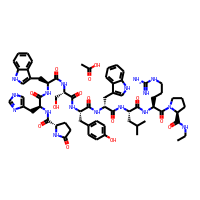
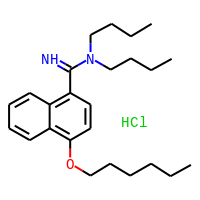

In [11]:
mols[['Active', 'DSSTox_CID', 'FW', 'Formula', 'ID', 'Molecule', 'SMILES']].head(2)

In [12]:
names = [x[0] for x in Descriptors._descList]
print("Number of descriptors in the rdkit: ", len(names))
np.array(names)


Number of descriptors in the rdkit:  200


array(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt',
       'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons',
       'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2',
       'FpDensityMorgan3', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n',
       'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n',
       'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1',
       'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10',
       'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14',
       'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6',
       'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10',
       'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6',
       'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10',
       'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2831: RuntimeWarning: divide by zero encountered in ? (vectorized)
  outputs = ufunc(*inputs)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2831: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


shape of data : (9357, 23)


,Active,DSSTox_CID,FW,Formula,ID,Molecule,SMILES,TPSA,MaxPartialCharge,SlogP_VSA1,EState_VSA1,SMR_VSA1,MolLogP,MolMR,BalabanJ,Ipc,HallKierAlpha,Kappa1,Kappa2,Kappa3,RingCount,NumHAcceptors,NumHDonors
0,0,26683,1342.5025 (1282.4505+60.0520),C66H87N17O14,NCGC00167516-01,,CC(=O)O.CCNC(=O)C1CCCN1C(=O)C(CCCNC(=N)N)NC(=O)C(CC(C)C)NC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(Cc1ccc(O)cc1)NC(=O)C(CO)NC(=O)C(Cc1c[nH]c2ccccc12)NC(=O)C(Cc1c[nH]cn1)NC(=O)C1CCC(=O)N1,482.13,0.299685,58.901554,114.210193,68.059491,-0.45963,355.2076,0.000003,1.754825e+23,-10.85,73.558677,35.596275,21.584998,8,15,18
1,0,26837,419.0430 (382.5820+36.4609),C25H39ClN2O,NCGC00181091-01,,CCCCCCOc1ccc(C(=N)N(CCCC)CCCC)c2ccccc12.Cl,36.32,0.128188,4.736863,0.000000,4.736863,7.44827,129.0507,0.000004,1.997364e+06,-1.74,25.296684,14.275348,7.544791,2,2,1

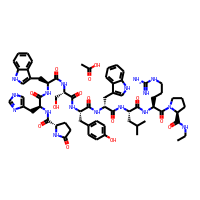
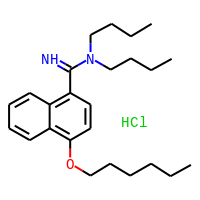

In [13]:
for desc in ['TPSA','MaxPartialCharge','SlogP_VSA1','EState_VSA1','SMR_VSA1','MolLogP','MolMR','BalabanJ','Ipc','HallKierAlpha','Kappa1','Kappa2','Kappa3','RingCount','NumHAcceptors','NumHDonors']:
    exec("mols[desc]=vec(Descriptors.{})(mols['Molecule'])".format(desc))
print("shape of data : {}".format(mols.shape))
mols.head(2)


In [14]:
print(mols.isnull().any())

Active              False
DSSTox_CID          False
FW                  False
Formula             False
ID                  False
Molecule            False
SMILES              False
TPSA                False
MaxPartialCharge     True
SlogP_VSA1          False
EState_VSA1         False
SMR_VSA1            False
MolLogP             False
MolMR               False
BalabanJ            False
Ipc                 False
HallKierAlpha       False
Kappa1              False
Kappa2              False
Kappa3              False
RingCount           False
NumHAcceptors       False
NumHDonors          False
dtype: bool


In [0]:
mols_desc=mols.drop(["MaxPartialCharge","Ipc","Kappa3", "Active", "DSSTox_CID", "FW", "Formula", "ID", "Molecule", "SMILES"], axis=1)

In [16]:
def set_color(L):
O = []
    for l in L:
        if l == '1':
            O.append("red")
        else:
            O.append("palegreen")
    return O

pd.plotting.scatter_matrix(mols_desc,figsize=(16,16), hist_kwds={'bins':15},  
                           marker='+', s=8, alpha=.5, c=set_color(mols.Active))
plt.show()

IndentationError: ignored

In [0]:
X_train, X_test, y_train, y_test = train_test_split(mols_desc, mols.Active, train_size=0.75, test_size=0.25)

In [22]:
print("Training Data")
print("Number of   active molecules:  ", list(y_train).count('1'))
print("Number of inactive molecules:  ", list(y_train).count('0'))
print("Test Data")
print("Number of   active molecules:  ", list(y_test).count('1'))
print("Number of inactive molecules:  ", list(y_test).count('0'))

Training Data
Number of   active molecules:   281
Number of inactive molecules:   6736
Test Data
Number of   active molecules:   99
Number of inactive molecules:   2241


In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set:        {:.3f}".format(model.score(X_test,  y_test)))

Accuracy on training set: 0.992
Accuracy on test set:        0.976


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [26]:
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set:     {:.3f}".format(model.score(X_test , y_test)))
df = pd.DataFrame(model.feature_importances_, index = X_train.columns)
df

Accuracy on training set: 0.992
Accuracy on test set:     0.976


,0
TPSA,0.083489
SlogP_VSA1,0.069371
EState_VSA1,0.068415
SMR_VSA1,0.070850
MolLogP,0.077801
MolMR,0.096917
BalabanJ,0.104642
HallKierAlpha,0.088685
Kappa1,0.084645
Kappa2,0.111901
